In [1]:
# importing the libiraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset = pd.read_csv('churn.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='count', ylabel='Exited'>

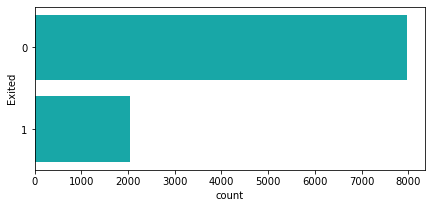

In [5]:
# plotting the target
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Exited", data=dataset, color="c")

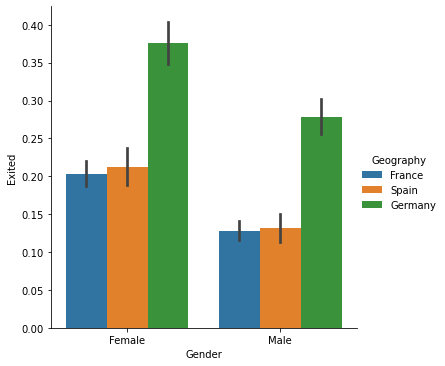

In [6]:
# exited people by country and gender
sns.catplot(x="Gender", y="Exited", hue="Geography", kind="bar", data=dataset)

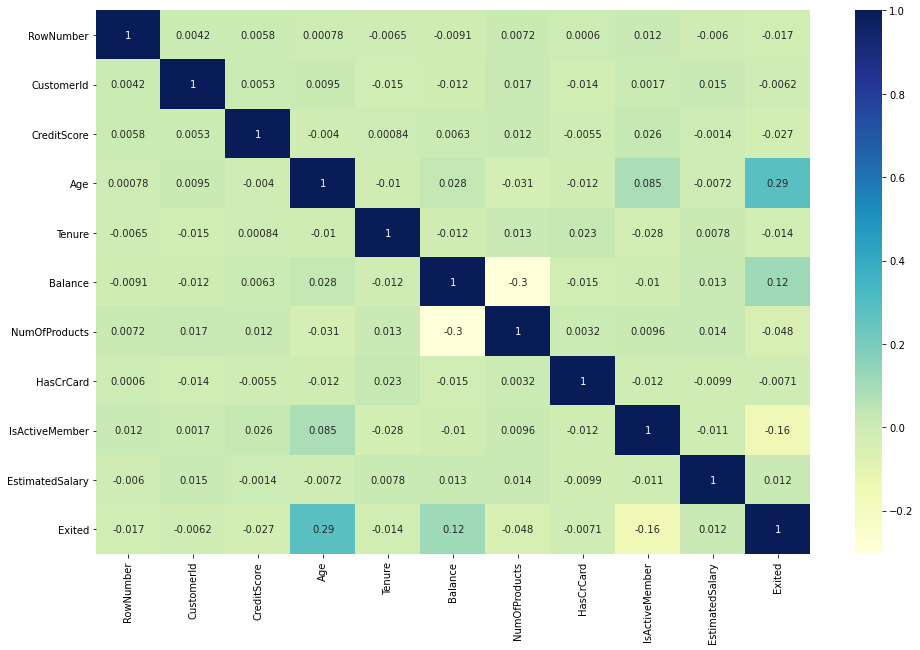

In [7]:
#graph the correlation  
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Age and Balance are the most correlated features to the churn lets graph them 

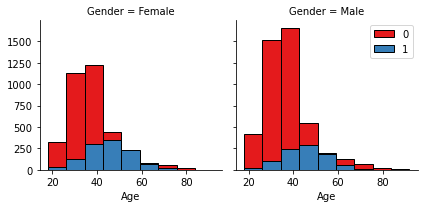

In [8]:
bins = np.linspace(dataset.Age.min(), dataset.Age.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="Exited", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### most exited persons are female and most age value between 40 and 60

<AxesSubplot:>

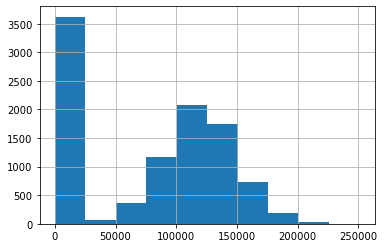

In [9]:
#lets see the balance distrbution 
dataset['Balance'].hist()

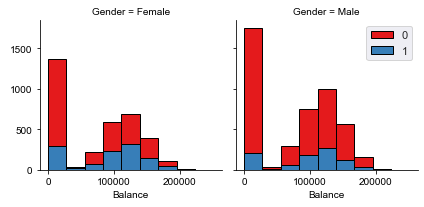

In [10]:
import seaborn as sns

bins = np.linspace(dataset.Balance.min(), dataset.Balance.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="Exited", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Balance', bins=bins, ec="k")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g.axes[-1].legend()
plt.show()

#### Balanace for exited  persons mostly 0 and around 120,000 for the female 

### Convert Categorical features to numerical values

In [11]:
# convert the gender to 0 , 1
dataset['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


##### one hot encoding for the Geography

In [12]:
Feature = dataset[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
Feature = pd.concat([Feature,pd.get_dummies(dataset['Geography'])], axis=1)
Feature.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
X = Feature
X[0:5]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [14]:
y = dataset['Exited'].values
y[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [20]:
# splitting the data into features and traget 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#### Time for scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.13101975, -0.91878606, -0.47206892, ...,  0.99925028,
        -0.56965192, -0.58447119],
       [-1.66784299, -0.91878606,  1.82260267, ..., -1.00075028,
        -0.56965192,  1.71094831],
       [-1.50243032,  1.08839266, -0.56768024, ..., -1.00075028,
         1.75545796, -0.58447119],
       ...,
       [-0.17912899, -0.91878606,  1.82260267, ..., -1.00075028,
        -0.56965192,  1.71094831],
       [-0.37555653,  1.08839266, -0.85451419, ..., -1.00075028,
         1.75545796, -0.58447119],
       [-1.92630028,  1.08839266, -0.47206892, ..., -1.00075028,
        -0.56965192,  1.71094831]])

## Classification 

we will use below models and their hyperparamter 

 **K Nearest Neighbor(KNN)**
 
 **Decision Tree**
 
 **Support Vector Machine**
 
 **Logistic Regression**
 
 **XGboost classifier**

#####  we will save the models on dict to show them later

In [18]:
clfs = {}

#### K Nearest Neighbor(KNN)

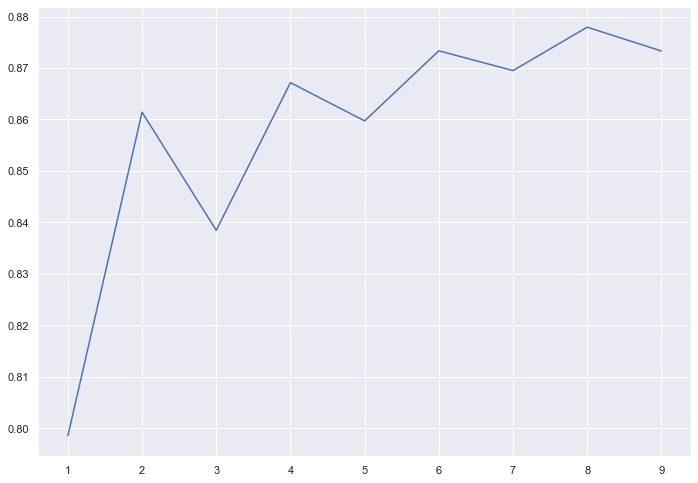

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
# will graph the k to see the optimal k to use 
scores = []

for i in range(1, 10):
    clf = KNeighborsClassifier(i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    scores.append(f1_score(y_test, y_pred, pos_label=0))

plt.plot(np.arange(1, 10), scores)
plt.show()

#### As we see best k is 8 

In [26]:
knn_clf = KNeighborsClassifier(8)
#trainin score
knn_clf.fit(x_train, y_train)
knn_clf.score(x_train, y_train)

0.80475

### Applying confusion matrix to compare test with predicted

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn_clf.predict(x_test)
cm_knn_clf = confusion_matrix(y_test, y_pred)
print(cm_knn_clf)
accuracy_score(y_test, y_pred)

[[1557   14]
 [ 419   10]]


0.7835

In [28]:
clfs['knn'] = knn_clf

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
tree_clf.score(x_train, y_train)

1.0

In [32]:
y_pred = tree_clf.predict(x_test)
cm_tree_clf = confusion_matrix(y_test, y_pred)
print(cm_tree_clf)
accuracy_score(y_test, y_pred)

[[1344  227]
 [ 215  214]]


0.779

### hyperparamter for Decision Tree using Grid search

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':np.arange(2, 10),
             'min_samples_leaf': np.arange(1, 10),
             'max_depth': [2, 3, 5, 10, None],
             'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='f1_micro', verbose=1, n_jobs=-1)

tree_grid.fit(x_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, None],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1_micro', verbose=1)

In [34]:
tree_grid.best_score_

0.8561252611615595

In [35]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [36]:
tree_grid.best_estimator_.score(x_test, y_test)

0.847

In [37]:
tree_clf = tree_grid.best_estimator_
clfs['tree'] = tree_clf

### Support Vector Machine

In [38]:
from sklearn.svm import LinearSVC, SVC
l_svc_clf = LinearSVC()
l_svc_clf.fit(x_train, y_train)
l_svc_clf.score(x_train, y_train)

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.799

In [39]:
y_pred = l_svc_clf.predict(x_test)
cm_l_svc_clf = confusion_matrix(y_test, y_pred)
print(cm_l_svc_clf)
accuracy_score(y_test, y_pred)

[[1571    0]
 [ 429    0]]


0.7855

In [41]:
clfs['svm'] = l_svc_clf

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_train, y_train)

0.793

In [43]:
y_pred = lr_clf.predict(x_test)
cm_lr_clf = confusion_matrix(y_test, y_pred)
print(cm_lr_clf)
accuracy_score(y_test, y_pred)

[[1538   33]
 [ 413   16]]


0.777

##### Diffirent parameters 

In [44]:
param_grid = {
    "C": np.logspace(0, 4, 10),
    "penalty" : ["l1", "l2"]
}

lr_grid = GridSearchCV(LogisticRegression(),param_grid, scoring='f1_micro', cv=3, n_jobs=-1, verbose=1)
lr_grid.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79387413        nan 0.79387413        nan 0.79387413
        nan 0.79387413        nan 0.79387413        nan 0.79387413
        nan 0.79387413        nan 0.79387413        nan 0.79387413
        nan 0.79387413]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_micro', verbose=1)

In [45]:
lr_grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [46]:
lr_grid.best_score_

0.7938741340753261

In [47]:
lr_grid.best_estimator_.score(x_test, y_test)

0.777

In [48]:
clfs['lr'] = lr_grid.best_estimator_

### XGBoost classifier

In [53]:
!pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [56]:
from xgboost import XGBClassifier
XG_clf = XGBClassifier()
XG_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
XG_clf.score(x_train, y_train)

0.961375

In [59]:
y_pred = XG_clf.predict(x_test)
cm_XG_clf = confusion_matrix(y_test, y_pred)
print(cm_XG_clf)
accuracy_score(y_test, y_pred)

[[1488   83]
 [ 217  212]]


0.85

In [63]:
param_grid = params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}
XG_grid = GridSearchCV(XGBClassifier(),param_grid, scoring='f1_micro', cv=3, n_jobs=-1, verbose=1)
XG_grid.fit(x_train, y_train)

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits


C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.85237456 0.8521245  0.84624976 ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

In [64]:
XG_grid.best_params_

{'base_score': 0.5,
 'booster': 'gbtree',
 'gamma': 1,
 'learning_rate': 0.05,
 'n_estimators': 100,
 'reg_alpha': 1,
 'reg_lambda': 0.5}

In [65]:
XG_grid.best_score_

0.8662502145971439

In [66]:
XG_grid.best_estimator_.score(x_test, y_test)

0.864

In [67]:
clfs['XG'] = XG_grid.best_estimator_

In [68]:
clfs.keys()

dict_keys(['knn', 'tree', 'svm', 'lr', 'XG'])

### classification Report 

In [79]:
from sklearn.metrics import classification_report
for clf, label in zip([knn_clf,tree_clf,l_svc_clf ,lr_clf,XG_clf], ['KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC', 'LogisticRegression','XGBClassifier']):
    print("{} report:".format(label))
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    print("\n---------------------\n")

KNeighborsClassifier report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1571
           1       0.42      0.02      0.04       429

    accuracy                           0.78      2000
   macro avg       0.60      0.51      0.46      2000
weighted avg       0.71      0.78      0.70      2000


---------------------

DecisionTreeClassifier report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1571
           1       0.79      0.39      0.52       429

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000


---------------------

LinearSVC report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1571
           1       0.00      0.00      0.00       429

    accuracy                           0.79      2000
  

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Best score for all classifiers for xgboost classifier

#### Lets make atest to predict a new person not on the trained data 

In [81]:
print(XG_clf.predict(sc.transform([[600,1,35,7,0.00,2,1,1,9000,1,0,0]])))

[0]


#### This person female from france with age 35 and estimated salary 9000 predeicted not to leave 